# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

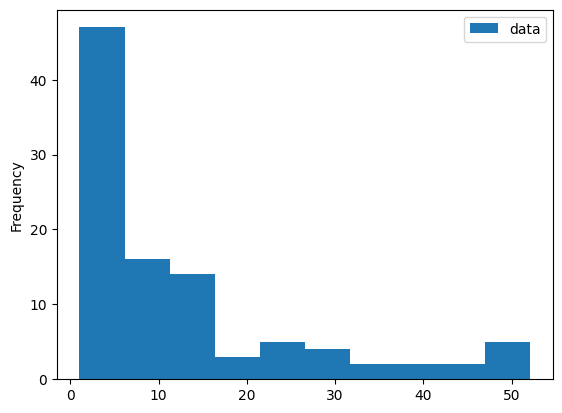

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

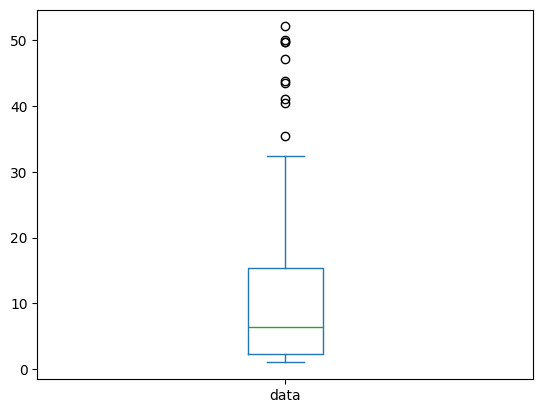

In [3]:
df.plot.box()

| Plot Type     | Pros                                                                 | Cons                                                                    |
|---------------|----------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Histogram** | Clearly shows the distribution shape, skewness, and modes                | Does not show key summary stats (such as median) explicitly                 |
| **Boxplot**   | Shows the median, IQR, and outliers very clearly                    | Does not show distribution shape or frequency of values                 |

In this case, the pharmacy administrator wants to understand how expensive drugs compare to the typical prices, so both summary and distribution are important. I would use both plots side by side to paint a full picture of the data. The histogram displays the full spread and skewness, while the boxplot identifies unusually expensive drugs. To improve clarity and visual appeal of the graphs I would do the following:
* Set an appropriate size for the bins. This avoids overcrowding and better displays the distribution.
* Add axis labels and titles to the graphs so that the viewers understand what the axes mean.
* Provide a reference line of important stats, such as the mean of the data.
* Use tight_layout() to prevent labels from being cut off.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

##### Load Dataset:

In [4]:
dm_campaign = pd.read_csv('digital_marketing_campaign_dataset.csv')
dm_campaign.head() #display first couple rows

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


#### Analysis:

In [5]:
#imports 
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style
sns.set(style="whitegrid")

#list of numerical cols
numerical_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                  'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                  'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']


##### Histograms:

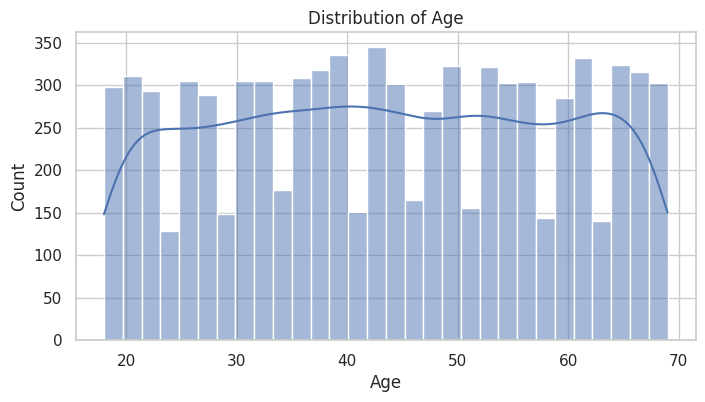

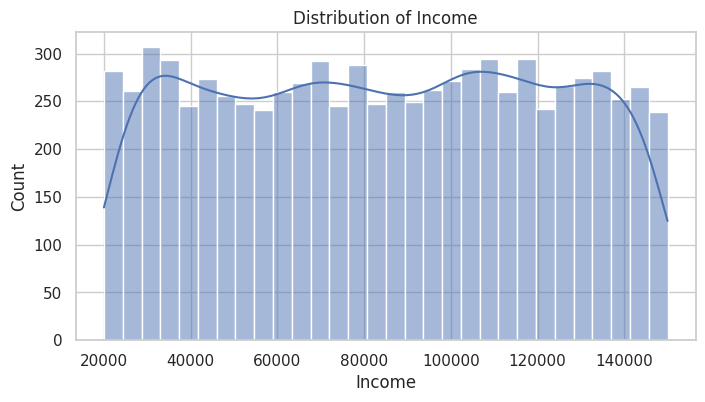

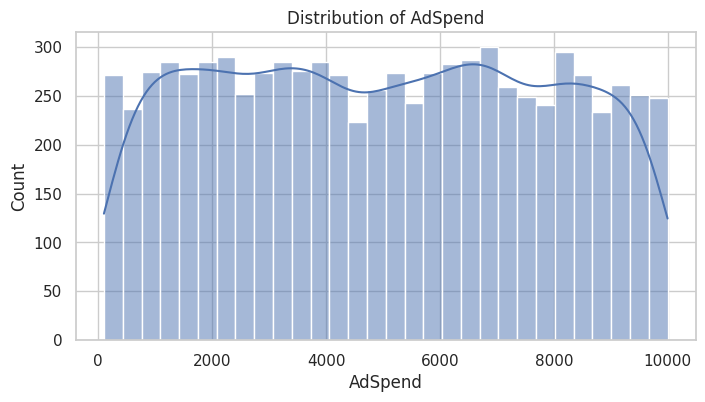

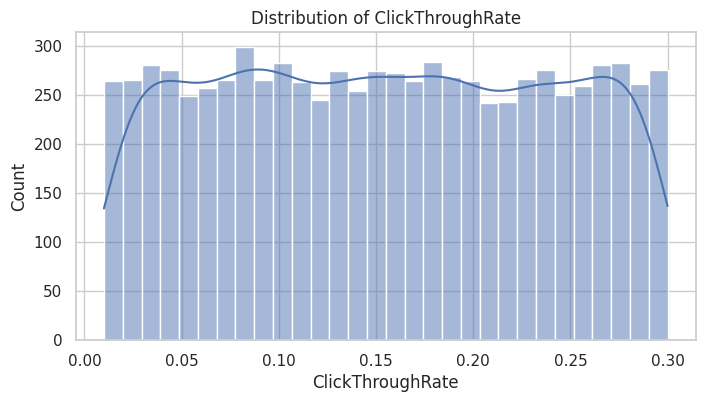

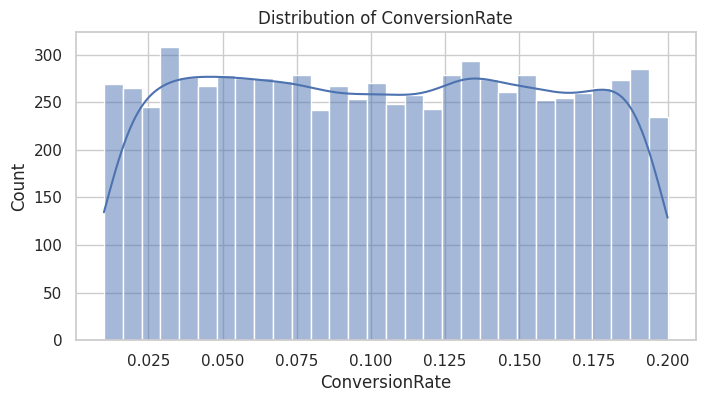

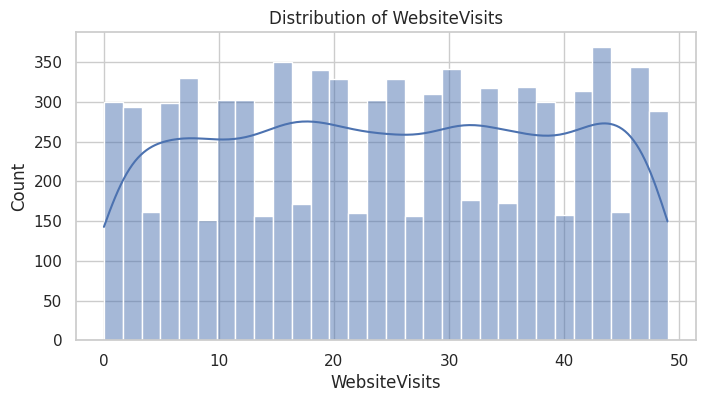

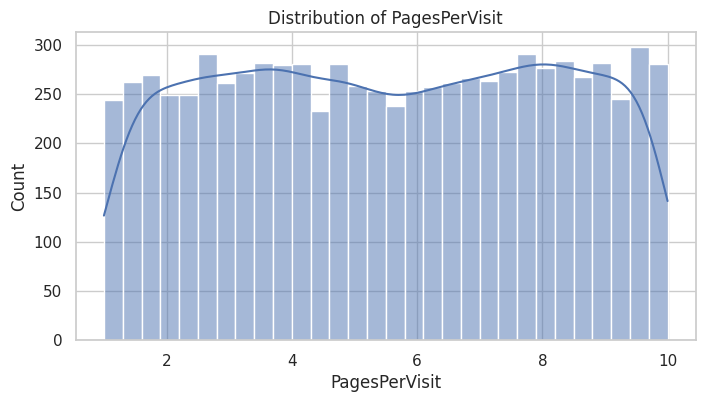

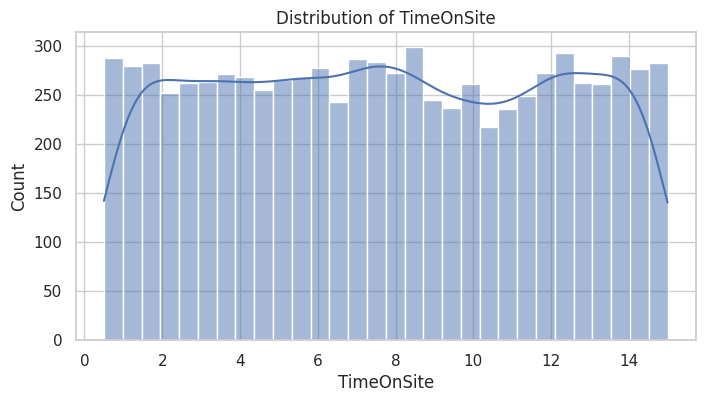

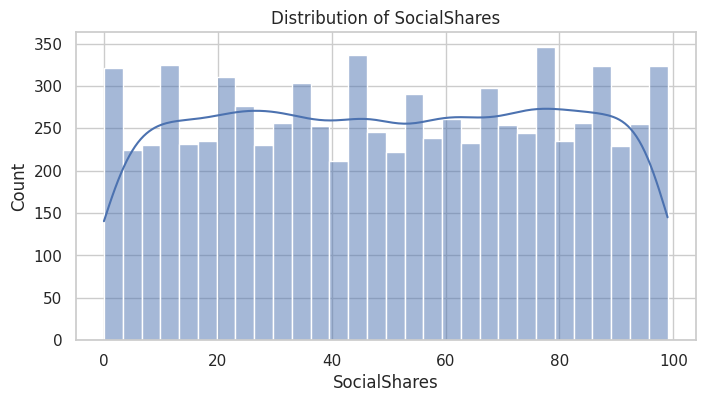

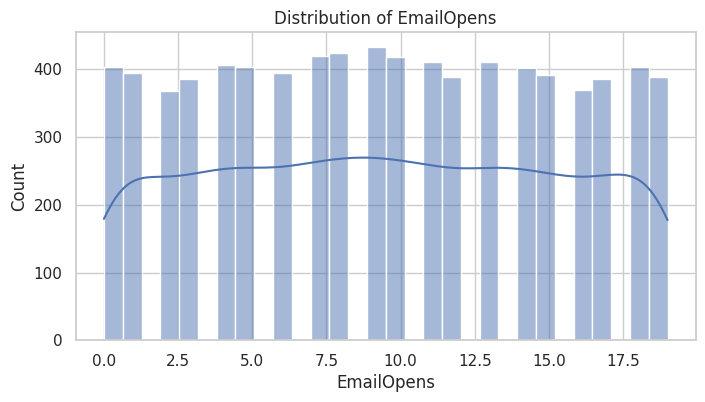

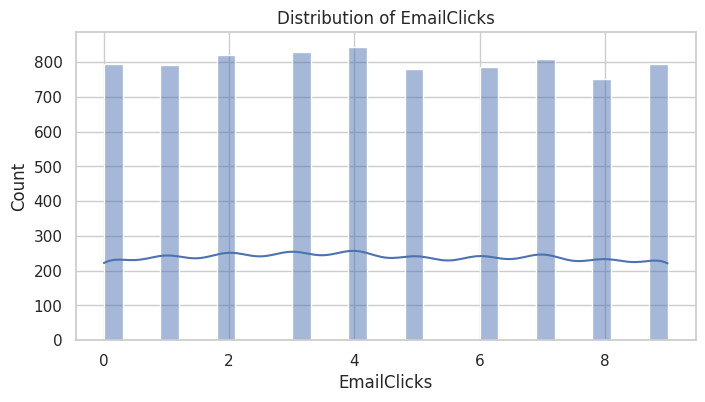

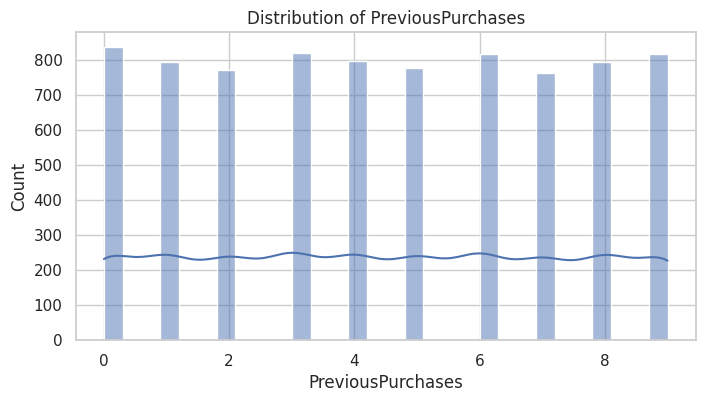

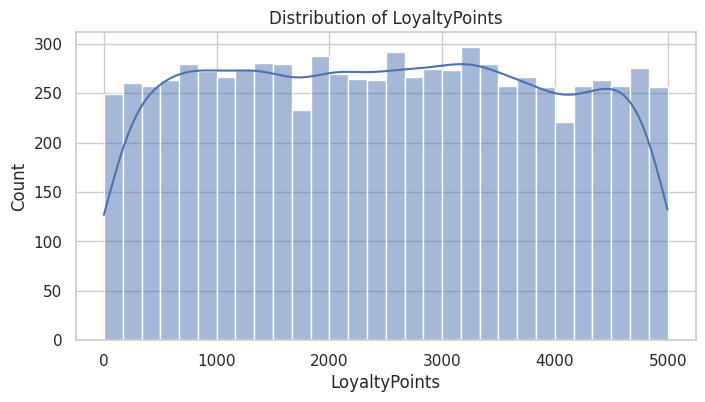

In [6]:
#create histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dm_campaign[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

##### KDE (Kernel Density Estimation) Plots:

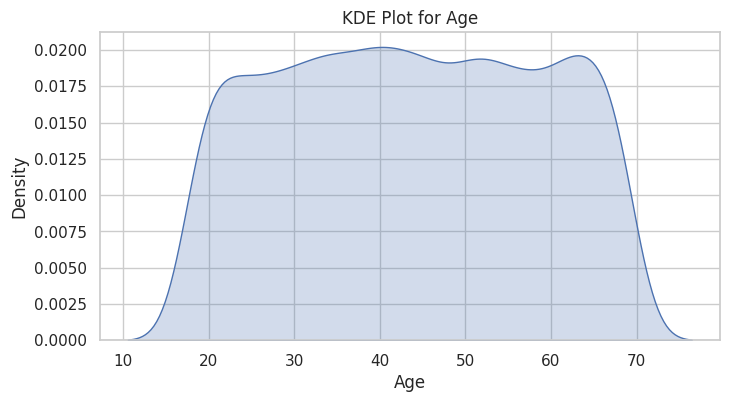

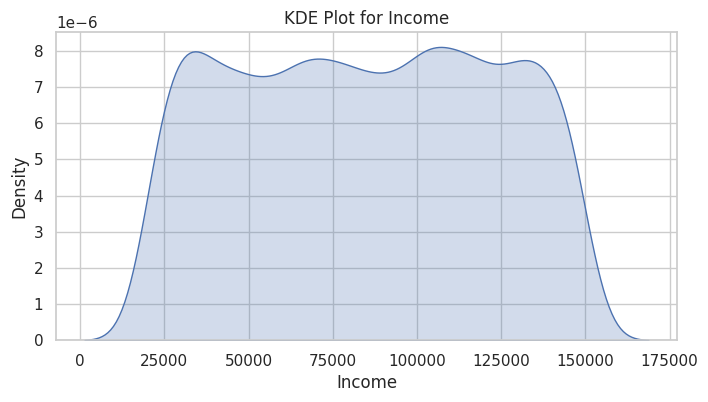

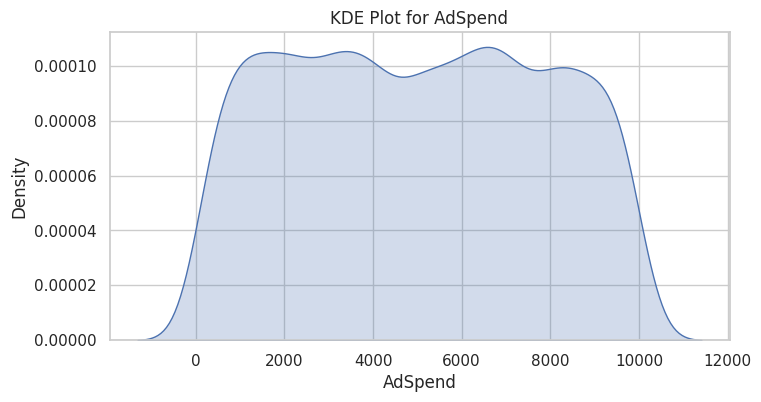

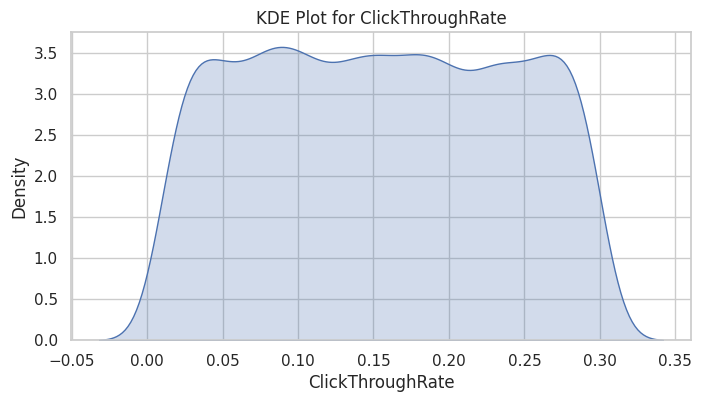

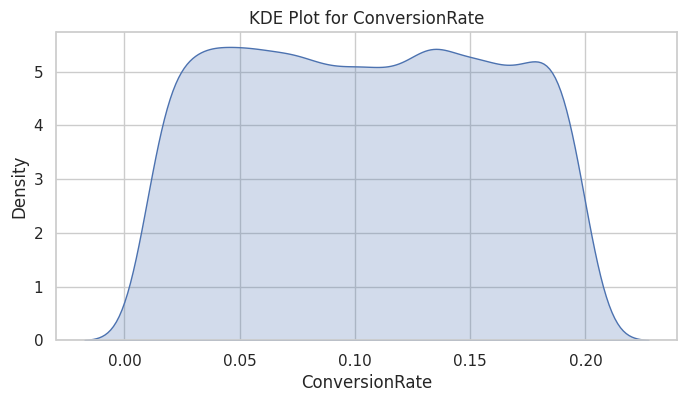

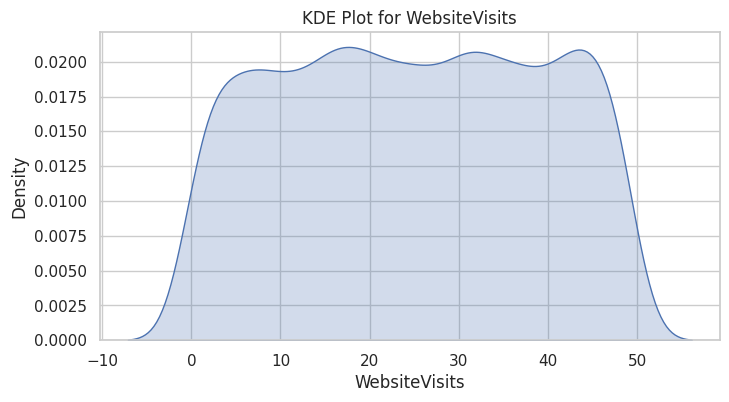

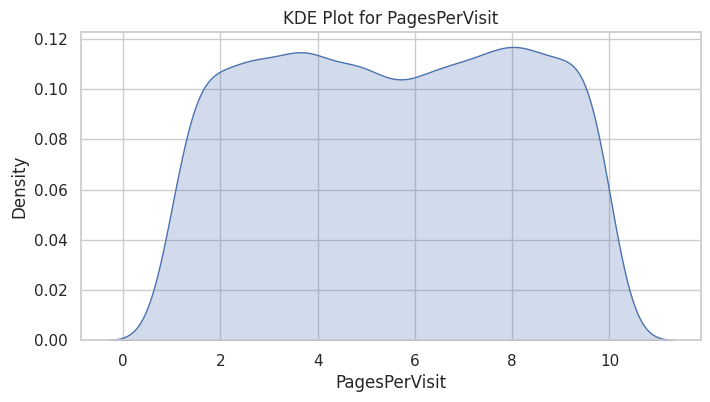

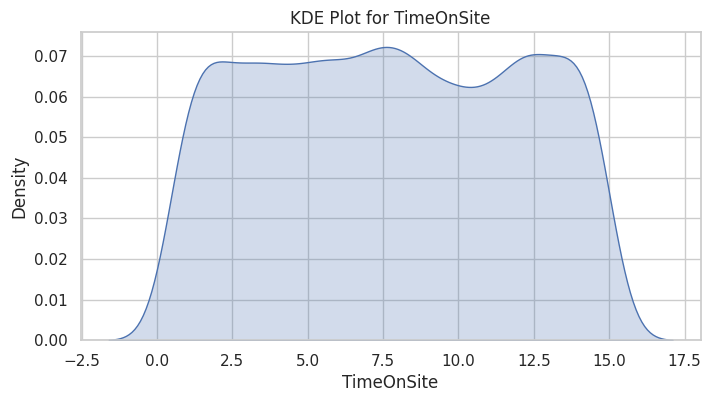

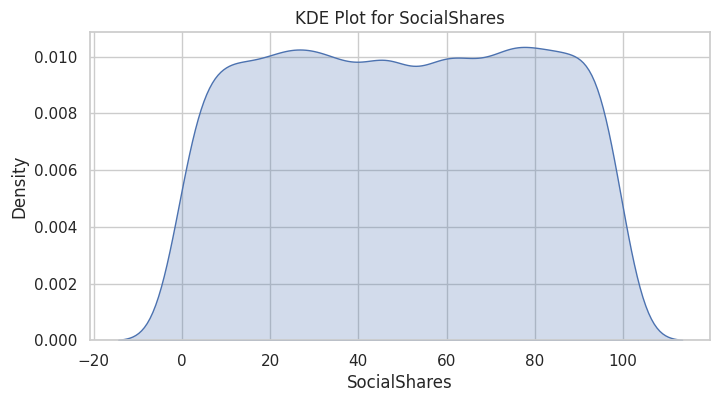

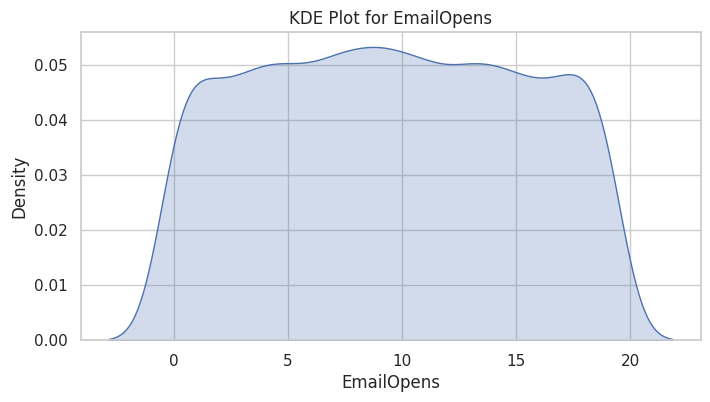

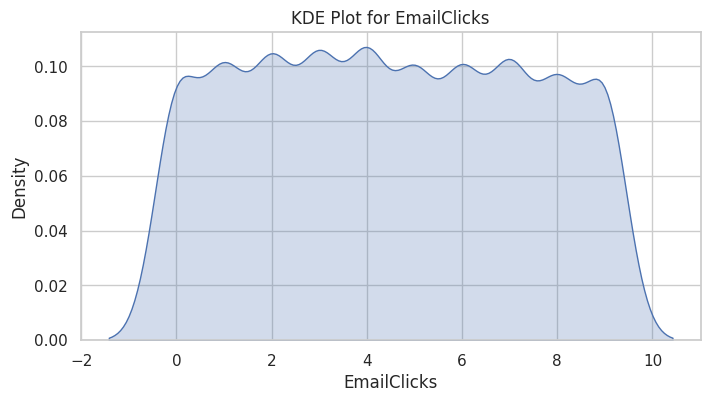

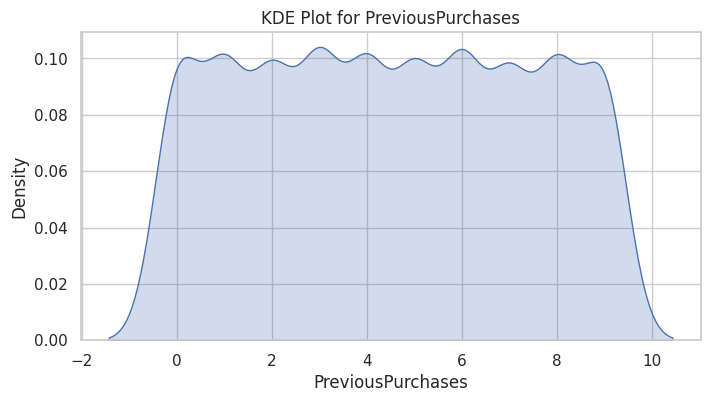

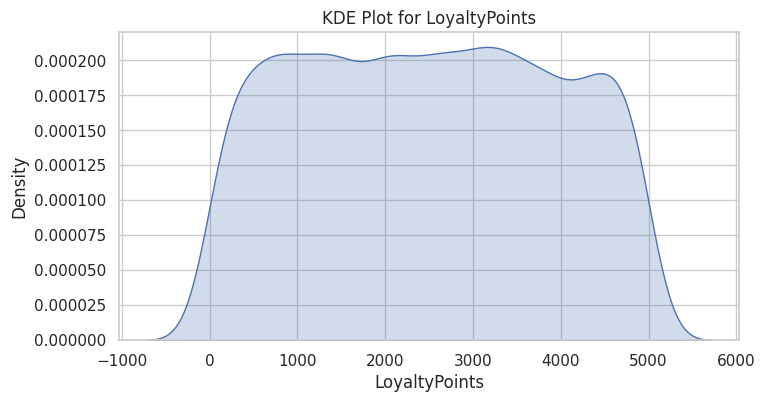

In [7]:
#create KDE plot (Kernel Density Estimation)
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(dm_campaign[col], fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.show()

##### Violin Plots:

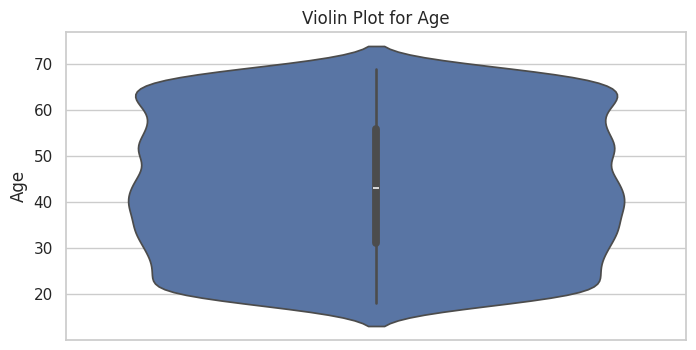

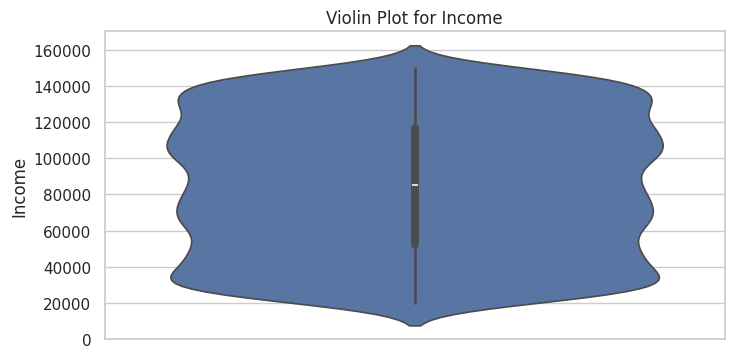

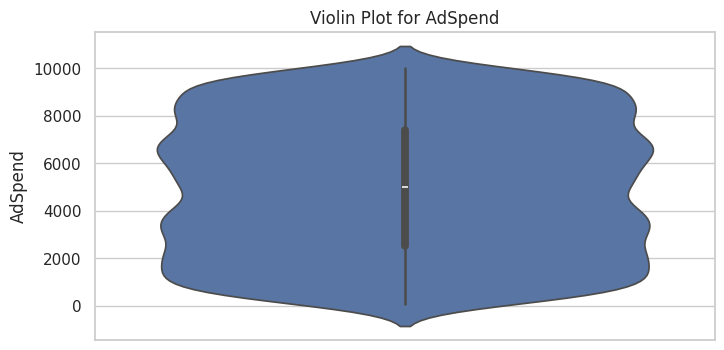

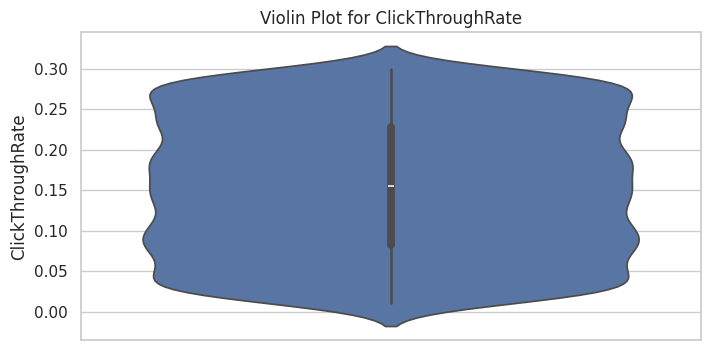

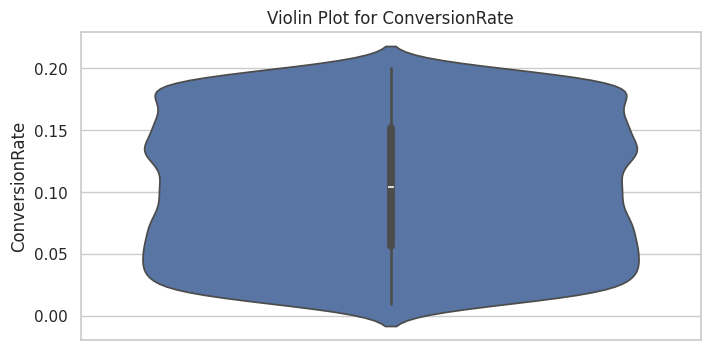

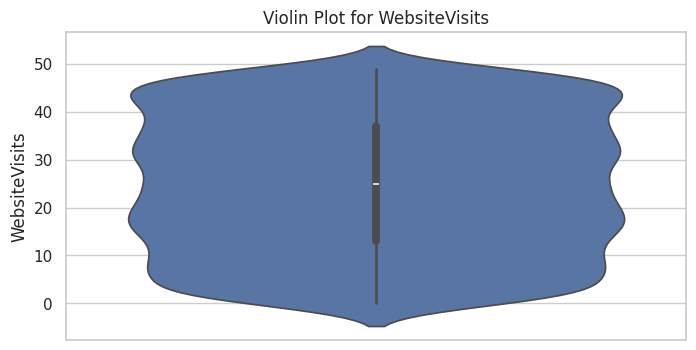

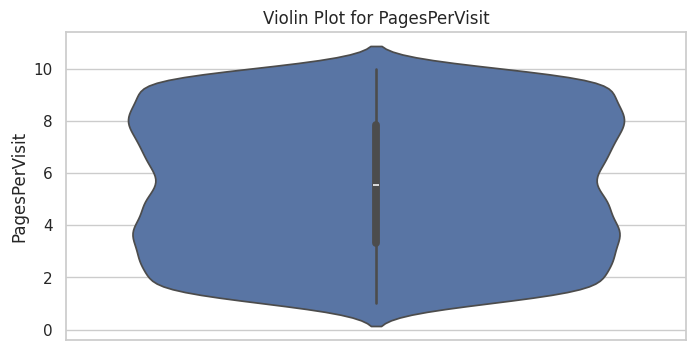

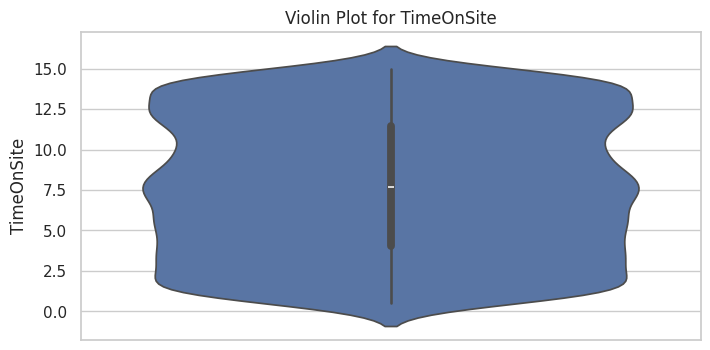

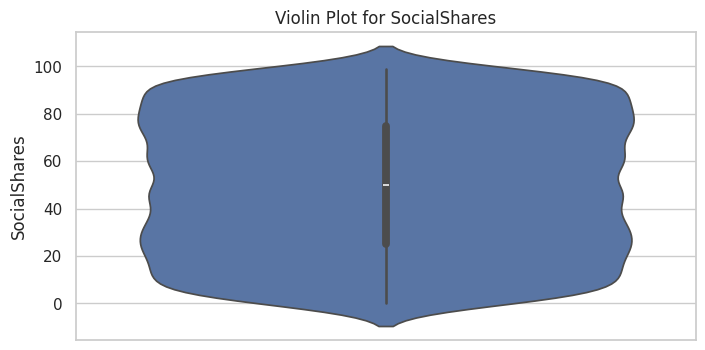

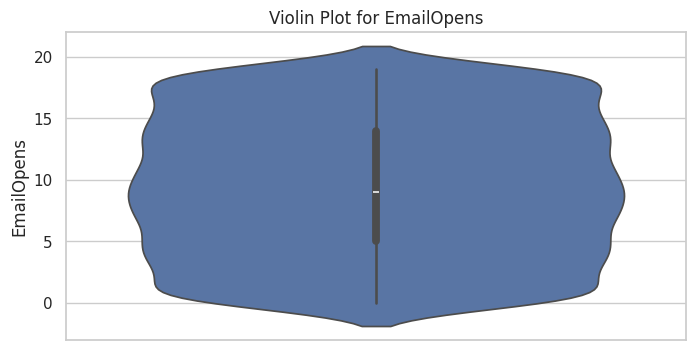

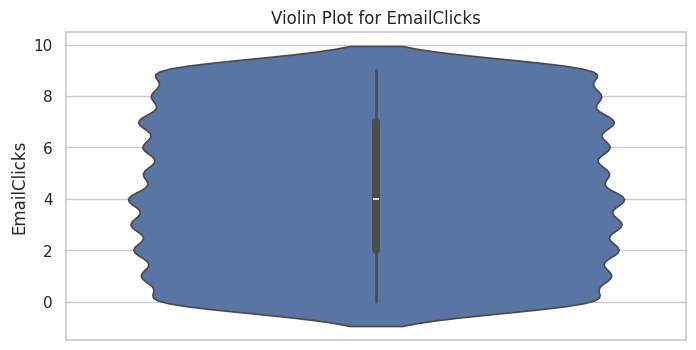

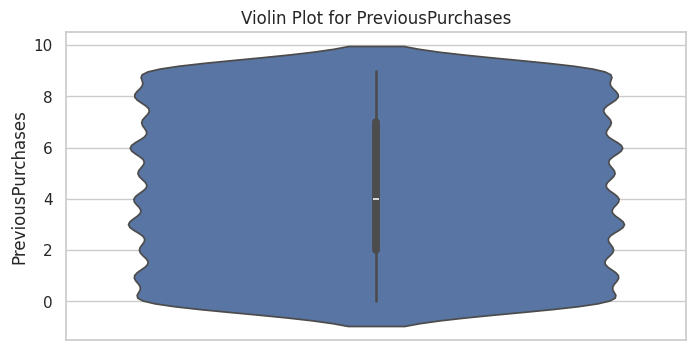

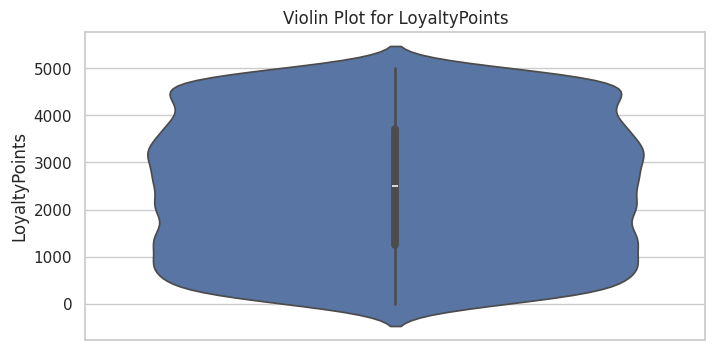

In [8]:
#create violin Plot
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(y=dm_campaign[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()

##### Grouped Histograms:

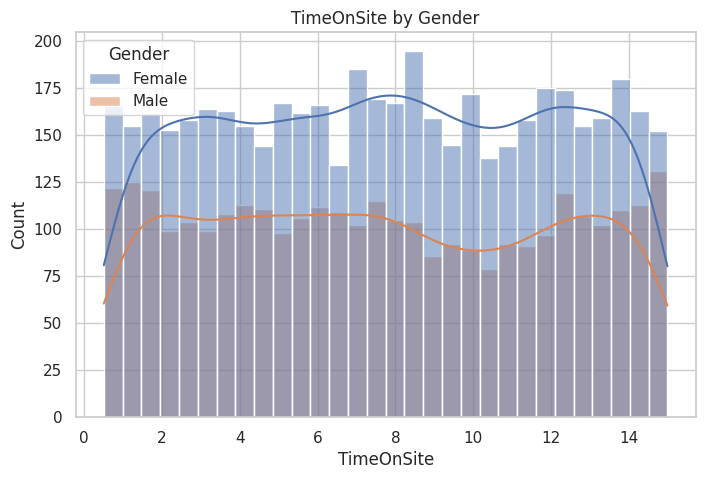

In [9]:
#Distribution of TimeOnSite grouped by Gender 
plt.figure(figsize=(8, 5))
sns.histplot(data=dm_campaign, x="TimeOnSite", hue="Gender", bins=30, kde=True)
plt.title('TimeOnSite by Gender')
plt.show()

##### Bar Plot for Categorical Counts:

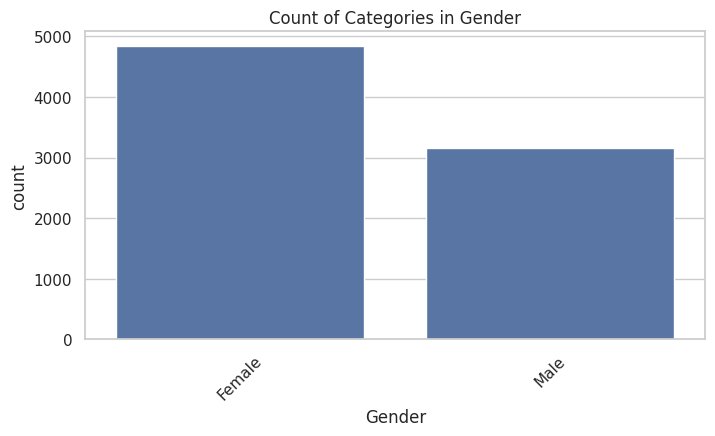

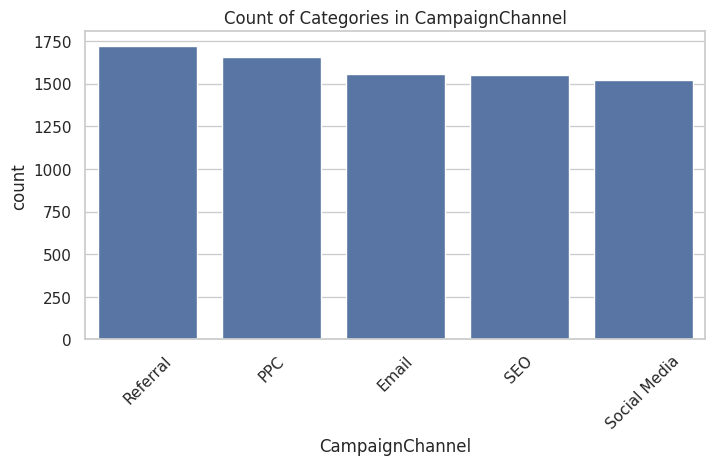

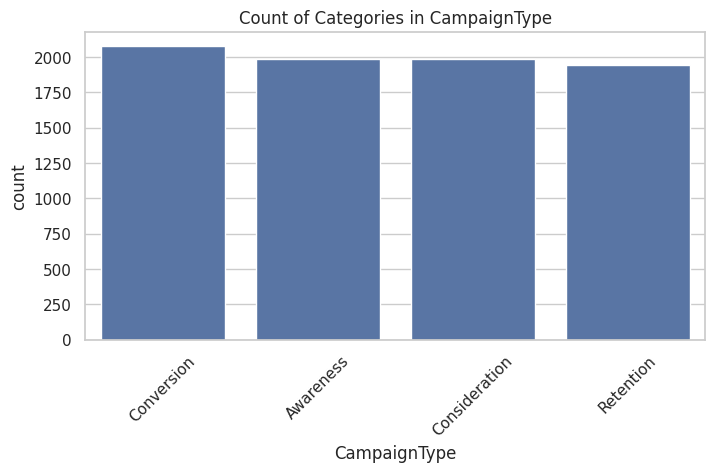

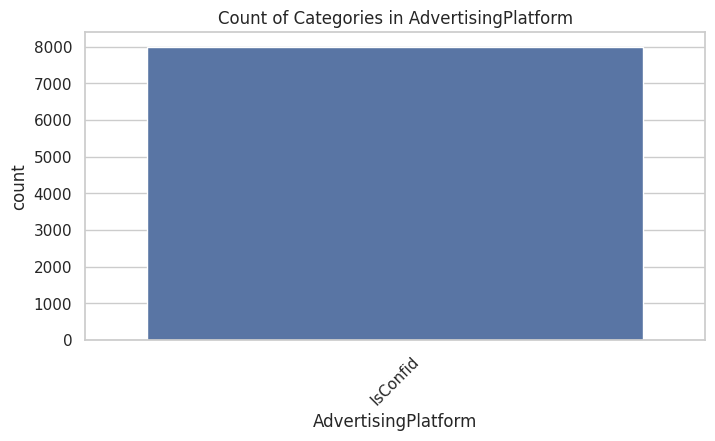

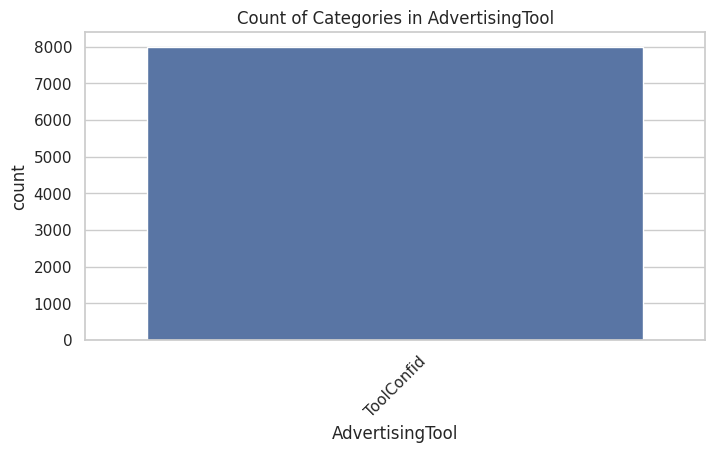

In [10]:
categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dm_campaign, x=col, order=dm_campaign[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

##### Mean, Median, and Mode:

In [11]:
print(dm_campaign[numerical_cols].describe())
for col in numerical_cols:
    print(f'Mode of {col}: {dm_campaign[col].mode().values}')

               Age         Income      AdSpend  ClickThroughRate  \
count  8000.000000    8000.000000  8000.000000       8000.000000   
mean     43.625500   84664.196750  5000.944830          0.154829   
std      14.902785   37580.387945  2838.038153          0.084007   
min      18.000000   20014.000000   100.054813          0.010005   
25%      31.000000   51744.500000  2523.221165          0.082635   
50%      43.000000   84926.500000  5013.440044          0.154505   
75%      56.000000  116815.750000  7407.989369          0.228207   
max      69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.30

#### Conclusions:

##### Overall:
* The dataset appears to be comprehensive and relevant. It captures key aspects of user behavior, marketing channels, and performance metrics. Most of the columns contain data in expected formats and ranges (i.e., Age is withing a reasonable adult range). There are no glaring data quality issues such as missing columns. Based on this, the dataset is usable and suitable for EDA, modeling, and campaign omptimization.

##### Distribution:
* Most numeric features are right-skewed, especially AdSpend, Income, WebsiteVisits, and TimeOnSite. This is typical in marketing datasets where a small group of customers may spend or engage more than the average population.
* Some features exhibit about normal distributions, such as Age and LoyaltyPoints, suggesting a more balances distribution across those variables.
* Bimodal patterns appear in metrics like PagesPerVisit and TimeOnSite where user behavior splits between casual and highly engaged users. 

##### Outliers:
* There are outliers present in features such as Income, AdSpend, TimeOnSite, and WebsiteVisits. These are expected in real-world marketing data and could represent high-value customers or edge-case interactons. Removing these outliers will depend on the goals of my future analysis.

##### How does the distribution change across different groups?
* When grouped by Gender or CampaignChannel, differences appear in metrics like TimeOnSite, ConversionRate, and EmailOpens. For example, one gender might consistently show higher engagement or responsiveness to certain channels.

* CampaignType (e.g., Email vs. Social Media) likely affects ClickThroughRate and ConversionRate distributions. Email campaigns may have higher variance due to differences in targeting, while social campaigns may show more uniform behavior.

##### How do bin sizes affect the histogram:
* Smaller bin sizes reveal the finer patterns in the data, such as small peaks, potential bimodal clusters, and subtle skews.

* Larger bin sizes smooth out noise but may hide important details.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

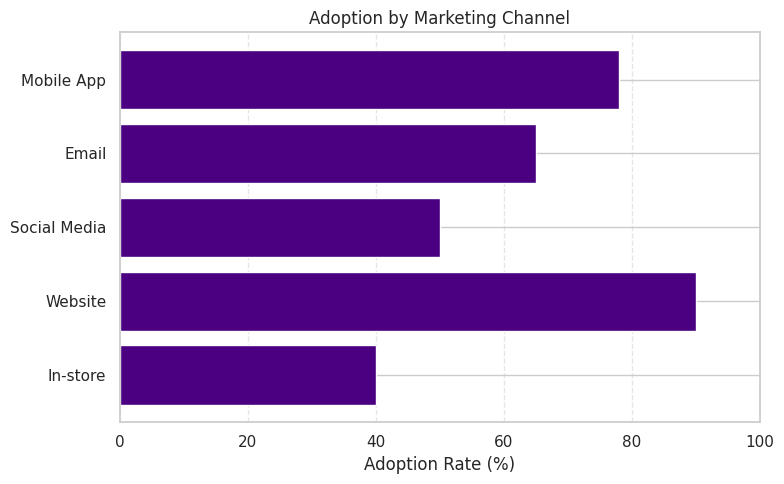

In [12]:
#mock data, % adoption by marketing channel
channels = [
    "Mobile App", 
    "Email", 
    "Social Media", 
    "Website", 
    "In-store"
]
adoption_rates = [78, 65, 50, 90, 40]

#reverse order for better horizontal bar chart alignment
channels = channels[::-1]
adoption_rates = adoption_rates[::-1]

#plot
plt.figure(figsize=(8, 5))
plt.barh(channels, adoption_rates, color='indigo')
plt.xlabel("Adoption Rate (%)")
plt.title("Adoption by Marketing Channel")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
